In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook
from bokeh.palettes import Category10_10
# Read the CSV file with counts
df = pd.read_csv('unique_words_ZH.csv')


# Chinese

## Tone

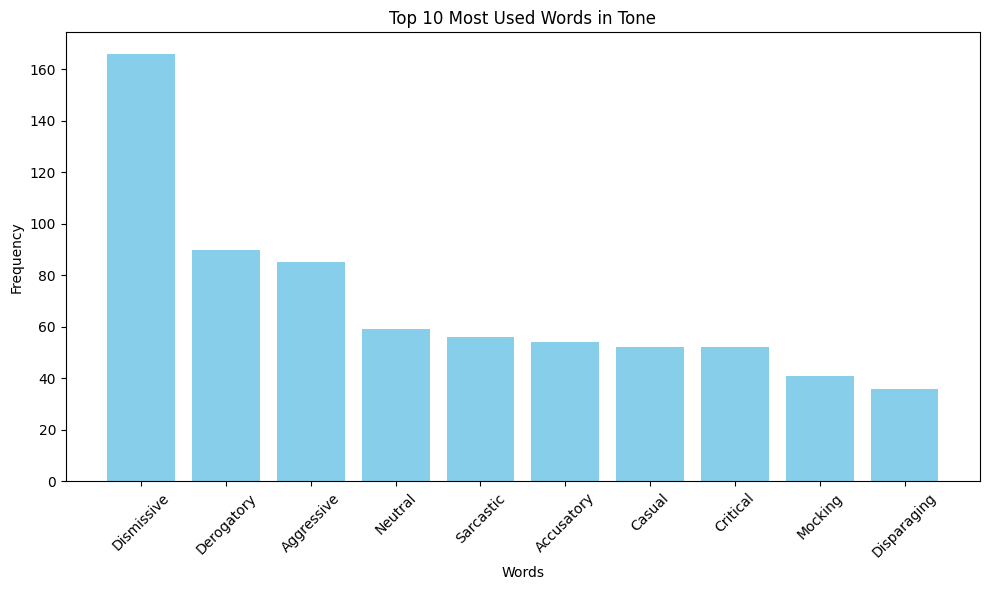

          Tone  Tone appears
0   Dismissive         166.0
1   Derogatory          90.0
2   Aggressive          85.0
3      Neutral          59.0
4    Sarcastic          56.0
5   Accusatory          54.0
6       Casual          52.0
7     Critical          52.0
8      Mocking          41.0
9  Disparaging          36.0


In [2]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

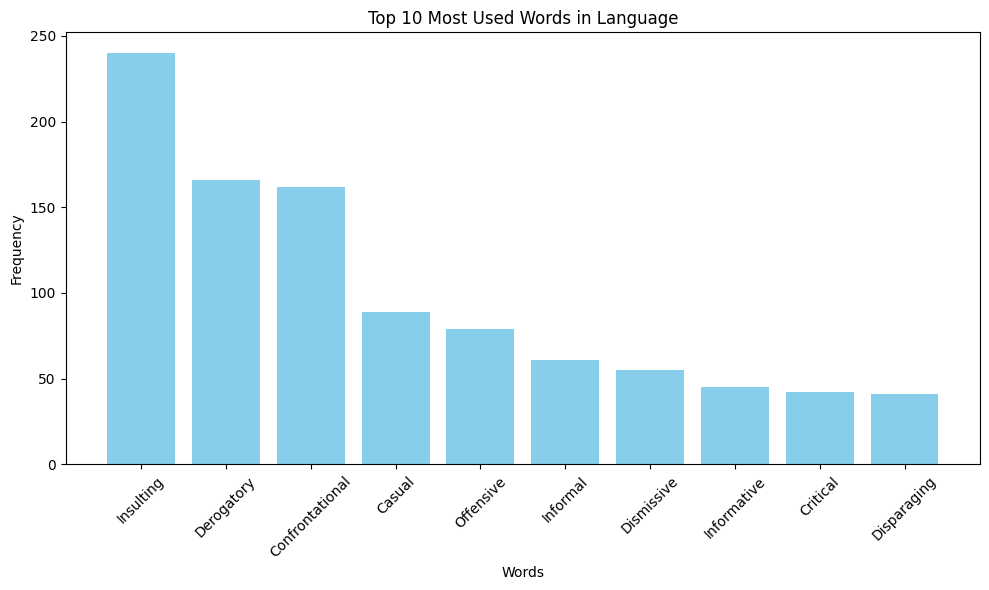

          Language  Language appears
0        Insulting             240.0
1       Derogatory             166.0
2  Confrontational             162.0
3           Casual              89.0
4        Offensive              79.0
5         Informal              61.0
6       Dismissive              55.0
7      Informative              45.0
8         Critical              42.0
9      Disparaging              41.0


In [3]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

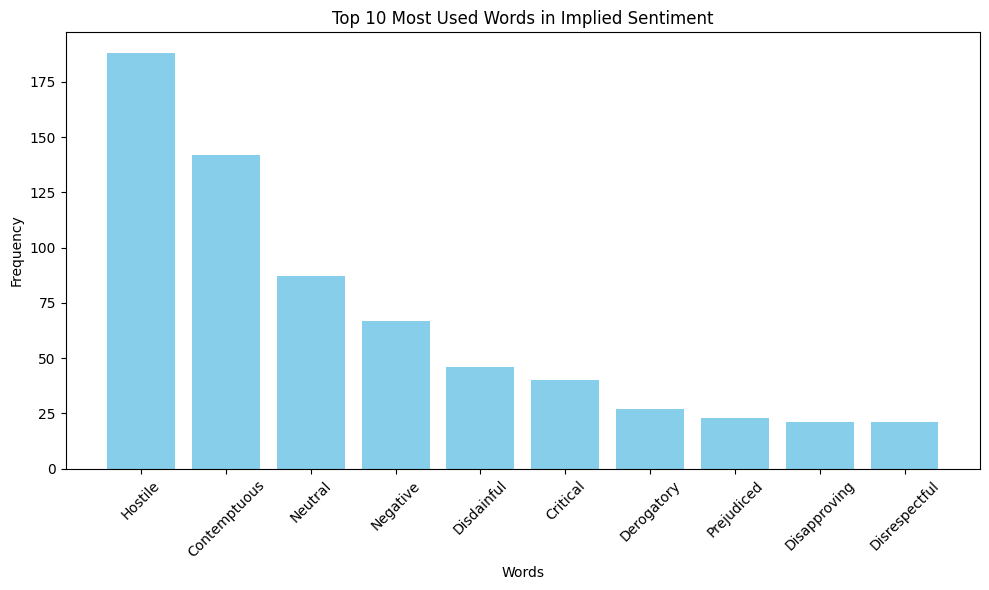

  Implied Sentiment  Implied Sentiment appears
0           Hostile                      188.0
1      Contemptuous                      142.0
2           Neutral                       87.0
3          Negative                       67.0
4        Disdainful                       46.0
5          Critical                       40.0
6        Derogatory                       27.0
7        Prejudiced                       23.0
8      Disapproving                       21.0
9     Disrespectful                       21.0


In [4]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

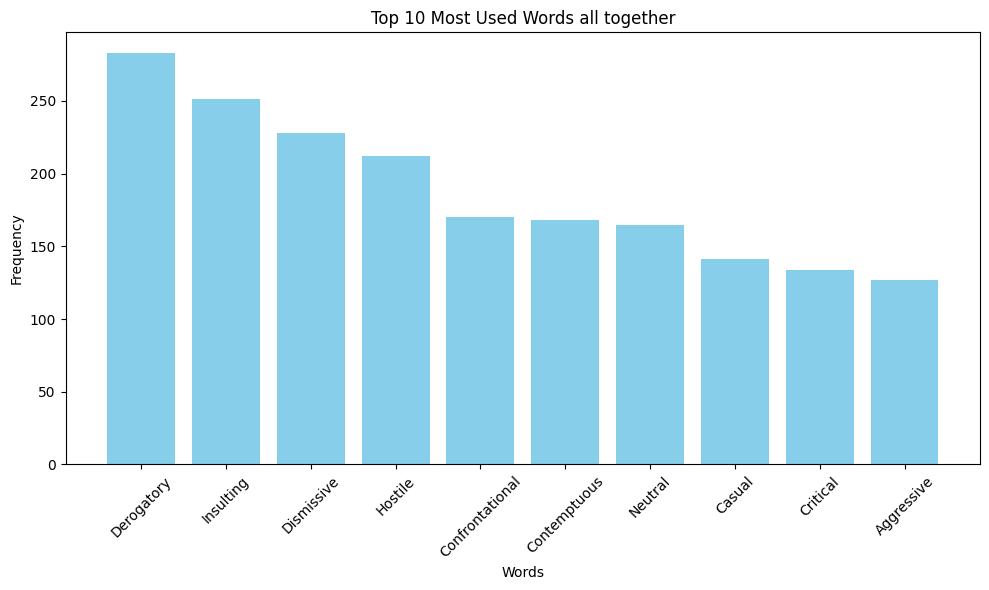

           combine  combine appears
0       Derogatory            283.0
1        Insulting            251.0
2       Dismissive            228.0
3          Hostile            212.0
4  Confrontational            170.0
5     Contemptuous            168.0
6          Neutral            165.0
7           Casual            141.0
8         Critical            134.0
9       Aggressive            127.0


In [5]:
# Plot histogram for the 'Combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(combine_df['combine'], combine_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(combine_df)

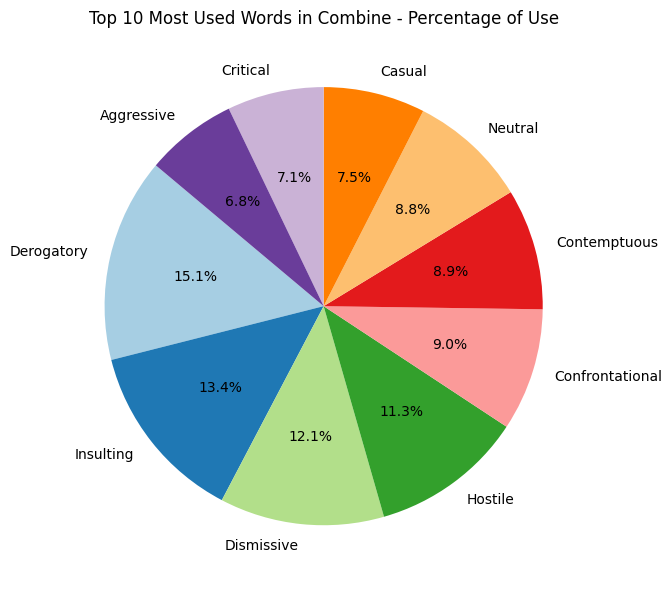

In [6]:
total_sentences = 1000

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

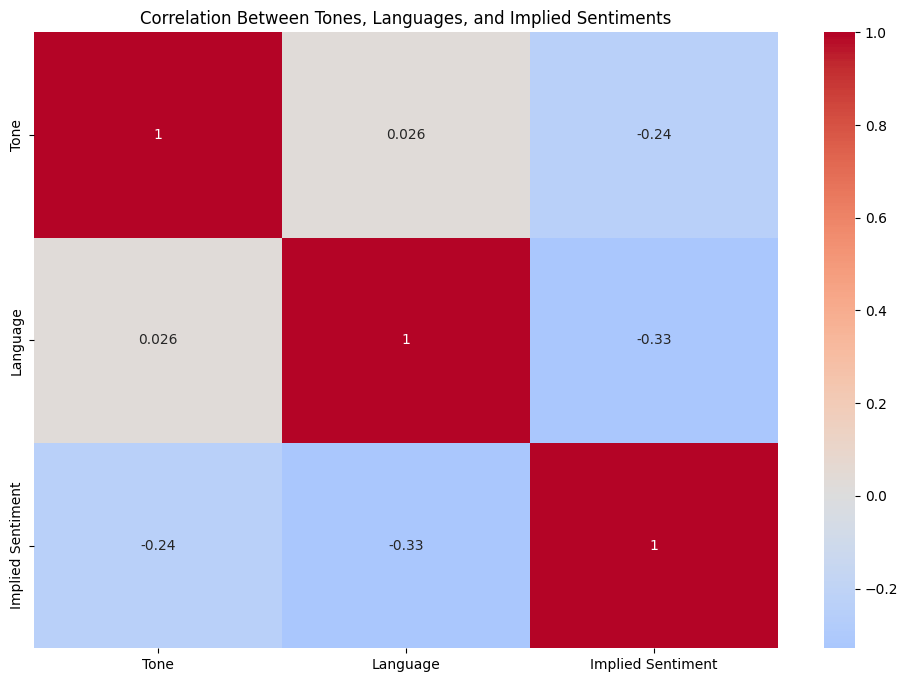

In [7]:
# Combine all data into one DataFrame for correlation analysis
combined_df = pd.DataFrame({
    'Tone': tone_df.set_index('Tone')['Tone appears'],
    'Language': language_df.set_index('Language')['Language appears'],
    'Implied Sentiment': implied_sentiment_df.set_index('Implied Sentiment')['Implied Sentiment appears']
}).fillna(0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Tones, Languages, and Implied Sentiments')
plt.show()

## Toxic words

In [8]:
df_t = pd.read_csv('ZH-toxicWordsList.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

print(df_toxic)

  uniq sequences  number appears
0             恶心              55
1             基佬              38
2            nan              26
3             舔狗              24
4             女拳              21
5            普信男              12
6             垃圾              11
7              骂              11
8             活该              11
9             歧视               9


## Toxic Words After Translation

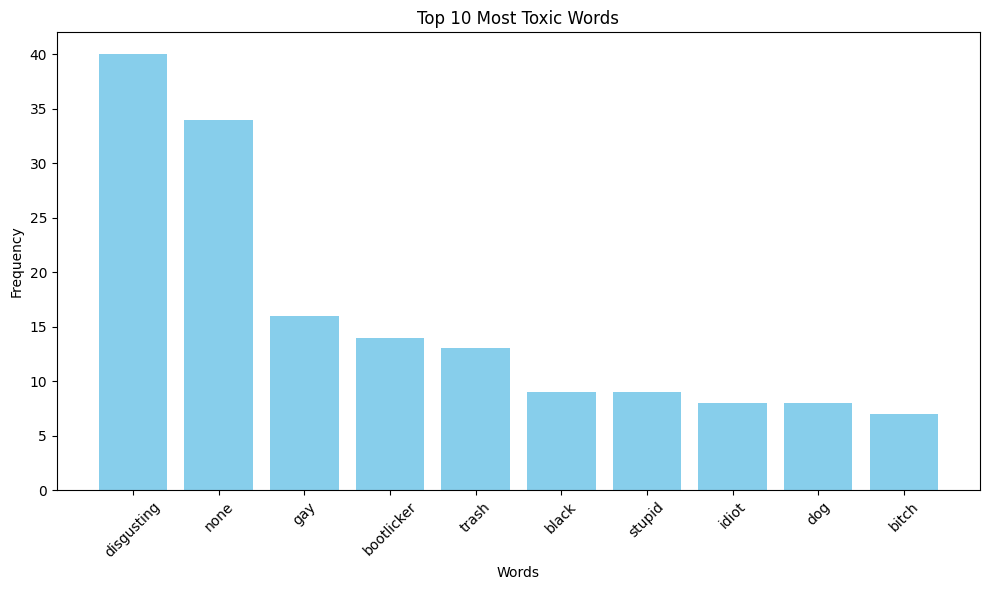

  uniq sequences  number appears
0     disgusting              40
1           none              34
2            gay              16
3     bootlicker              14
4          trash              13
5          black               9
6         stupid               9
7          idiot               8
8            dog               8
9          bitch               7


In [9]:
df_t = pd.read_csv('600-test/ZH-toxic.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(df_toxic['uniq sequences'], df_toxic['number appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Toxic Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df_toxic)

## Clustering With Tone Presentation

In [10]:

# Read the CSV file into a Pandas DataFrame
file_path = 'ZH-analyze-cluster.csv'
df = pd.read_csv(file_path)

# Extract the Keyword Vector column
keyword_vectors = np.array(df['Keyword Vector'].apply(eval).tolist())

# Compute PCA to reduce the dimensionality of the Keyword Vector
keyword_vectors_pca = PCA(n_components=2).fit_transform(keyword_vectors)

# Normalize vectors to have zero mean and unit variance
keyword_vectors_pca = StandardScaler().fit_transform(keyword_vectors_pca)

# Initialize Bokeh for notebook output
output_notebook()

# Function to draw interactive plot for data points with auxiliary info on hover
def draw_vectors(x, y, phrases, cluster_labels, radius=10, alpha=0.6, width=600, height=400, max_sentence_length=70, show=True, **kwargs):
    # Truncate sentences that are too long
    truncated_phrases = [phrase[:max_sentence_length] + '...' if len(phrase) > max_sentence_length else phrase for phrase in phrases]
    colors = [Category10_10[i] for i in cluster_labels]
    data_source = bm.ColumnDataSource({"x": x, "y": y, "phrases": truncated_phrases, "color": colors, **kwargs})
    fig = pl.figure(active_scroll="wheel_zoom", width=width, height=height)
    scatter = fig.scatter("x", "y", size=radius, color="color", alpha=alpha, source=data_source)
    hover_tool = bm.HoverTool(tooltips=[("Phrase", "@phrases")] + [(key, "@" + key) for key in kwargs.keys()], mode="mouse")
    fig.add_tools(hover_tool)
    if show:
        pl.show(fig)
    return fig

# Plotting the phrases in 2D space
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Tone'].tolist(), df['K_means_cluster'].tolist())


Loading BokehJS ...

figure(id='p1004', ...)

## Clustering With Language Presentation

In [11]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Language'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1053', ...)

## Clustering With Sentiment Presentation

In [12]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Implied Sentiment'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1102', ...)